In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import svm

import seaborn as sb
import pandas as pd

import numpy as np
from numpy import mean
from numpy import sqrt
from numpy import absolute

import matplotlib.pyplot as plt 

In [2]:
data = pd.read_excel('C:\\Users\\Kavian\\Desktop\\Jupyter\\global_effeicency_stroke.xlsx')
data

,Subject,Lession,Admission,Discharge,Score_division,Score_effective,gamma_ge,gamma_asymmetry,beta_ge,beta_asymmetry,alpha_ge,alpha_asymmetry
0,1,L,47,74,1.574468,0.574468,0.0211,-0.006000,0.0191,-0.018900,0.0211,-0.0098
1,2,R,48,72,1.500000,0.500000,0.0197,-0.010400,0.0146,-0.030700,0.0197,-0.0301
2,3,R,26,55,2.115385,1.115385,0.0176,-0.019800,0.0135,0.007500,0.0176,0.0111
3,4,R,43,66,1.534884,0.534884,0.0227,-0.016100,0.0171,0.000977,0.0227,-0.0128
4,5,L,39,59,1.512821,0.512821,0.0196,-0.032800,0.0177,-0.028100,0.0196,-0.0126
5,7,R,22,79,3.590909,2.590909,0.0185,-0.034000,0.0137,0.008300,0.0185,-0.0084
6,8,R,46,83,1.804348,0.804348,0.0191,-0.002400,0.0137,-0.028200,0.0191,-0.0273
7,9,R,31,65,2.096774,1.096774,0.0208,-0.015000,0.0227,-0.024600,0.0208,-0.0266
8,10,R,21,37,1.761905,0.761905,0.0202,-0.019000,0.0180,-0.012000,0.0202,-0.0111
9,11,R,34,77,2.264706,1.264706,0.0220,-0.012300,0.0169,-0.030500,0.0220,-0.0187


In [3]:
Score_division = data.Score_division.array
Score_effective = data.Score_effective.array

gamma_ge = data.gamma_ge.array
gamma_asymmetry = data.gamma_asymmetry.array

beta_ge = data.beta_ge.array
beta_asymmetry = data.beta_asymmetry.array

alpha_ge = data.alpha_ge.array
alpha_asymmetry = data.alpha_asymmetry.array

mse:  0.43388493869419076
accuracy:  -2.291788053650204
Correlation [[ 1.         -0.00239844]
 [-0.00239844  1.        ]]
K-fold_score:  0.808500120861438


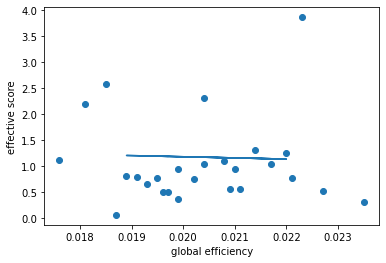

In [4]:
#Gama Band G_Effeiency
x = gamma_ge.reshape(-1,1)
y = Score_effective.reshape(-1,1)

x_train, x_test ,y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=42)

reg = LinearRegression()
model = reg.fit(x_train,y_train)
y_pred = reg.predict(x_test)
mse = sqrt(mean_squared_error(y_test, y_pred))
print('mse: ', mse)
print('accuracy: ',model.score(x_test, y_test))


corco = np.corrcoef(gamma_ge,Score_effective)
print('Correlation',corco)

cv = KFold(n_splits=5, random_state=1, shuffle=True)
scores = cross_val_score(model, x, y, scoring='neg_mean_absolute_error',cv=cv, n_jobs=-1)
print('K-fold_score: ',sqrt(mean(absolute(scores))))

plt.scatter(x,y)
plt.plot(x_test,y_pred)
plt.xlabel('global efficiency')
plt.ylabel('effective score')
plt.show()

mse:  0.44921812518470705
accuracy:  -2.5285579720150606
Correlation [[ 1.00000000e+00 -4.85288463e-04]
 [-4.85288463e-04  1.00000000e+00]]
K-fold_score:  0.8152629645174219


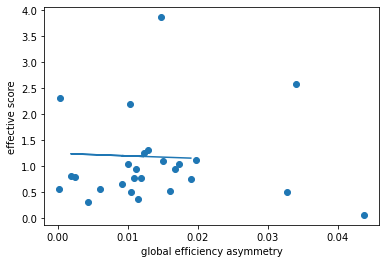

In [5]:
#Asymmetry Gama Band G_Effeiency
x = np.abs(gamma_asymmetry).reshape(-1,1)
y = Score_effective.reshape(-1,1)

x_train, x_test ,y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=42)

reg = LinearRegression()
model = reg.fit(x_train,y_train)
y_pred = reg.predict(x_test)
mse = sqrt(mean_squared_error(y_test, y_pred))
print('mse: ', mse)
print('accuracy: ',model.score(x_test, y_test))


corco = np.corrcoef(np.abs(gamma_asymmetry),Score_effective)
print('Correlation',corco)

cv = KFold(n_splits=5, random_state=1, shuffle=True)
scores = cross_val_score(model, x, y, scoring='neg_mean_absolute_error',cv=cv, n_jobs=-1)
print('K-fold_score: ',sqrt(mean(absolute(scores))))

plt.scatter(x,y)
plt.plot(x_test,y_pred)
plt.xlabel('global efficiency asymmetry')
plt.ylabel('effective score')
plt.show()

mse:  0.519597391593729
accuracy:  -3.720811281691361
Correlation [[ 1.         -0.34956743]
 [-0.34956743  1.        ]]
K-fold_score:  0.7652064433285178


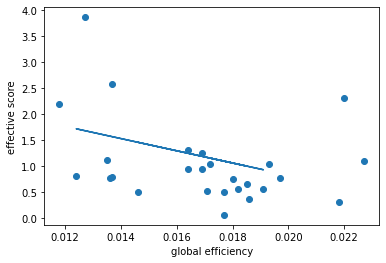

In [6]:
#Beta Band G_Effeiency
x = beta_ge.reshape(-1,1)
y = Score_effective.reshape(-1,1)

x_train, x_test ,y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=42)

reg = LinearRegression()
model = reg.fit(x_train,y_train)
y_pred = reg.predict(x_test)
mse = sqrt(mean_squared_error(y_test, y_pred))
print('mse: ', mse)
print('accuracy: ',model.score(x_test, y_test))


corco = np.corrcoef(beta_ge,Score_effective)
print('Correlation',corco)

cv = KFold(n_splits=5, random_state=1, shuffle=True)
scores = cross_val_score(model, x, y, scoring='neg_mean_absolute_error',cv=cv, n_jobs=-1)
print('K-fold_score: ',sqrt(mean(absolute(scores))))

plt.scatter(x,y)
plt.plot(x_test,y_pred)
plt.xlabel('global efficiency')
plt.ylabel('effective score')
plt.show()

mse:  0.414587048779256
accuracy:  -2.005482318155199
Correlation [[ 1.         -0.16679347]
 [-0.16679347  1.        ]]
K-fold_score:  0.8182381632575002


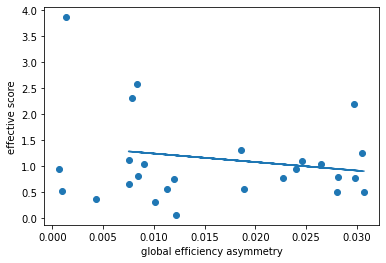

In [7]:
#Asymmetry Beta Band G_Effeiency
x = np.abs(beta_asymmetry).reshape(-1,1)
y = Score_effective.reshape(-1,1)

x_train, x_test ,y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=42)

reg = LinearRegression()
model = reg.fit(x_train,y_train)
y_pred = reg.predict(x_test)
mse = sqrt(mean_squared_error(y_test, y_pred))
print('mse: ', mse)
print('accuracy: ',model.score(x_test, y_test))


corco = np.corrcoef(np.abs(beta_asymmetry),Score_effective)
print('Correlation',corco)

cv = KFold(n_splits=5, random_state=1, shuffle=True)
scores = cross_val_score(model, x, y, scoring='neg_mean_absolute_error',cv=cv, n_jobs=-1)
print('K-fold_score: ',sqrt(mean(absolute(scores))))

plt.scatter(x,y)
plt.plot(x_test,y_pred)
plt.xlabel('global efficiency asymmetry')
plt.ylabel('effective score')
plt.show()

mse:  0.43388493869419076
accuracy:  -2.291788053650204
Correlation [[ 1.         -0.00239844]
 [-0.00239844  1.        ]]
K-fold_score:  0.808500120861438


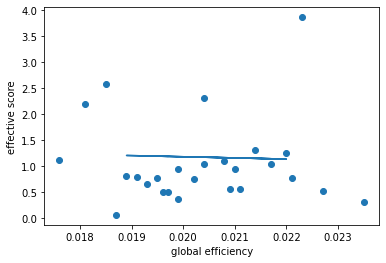

In [8]:
#Alpha Band G_Effeiency
x = alpha_ge.reshape(-1,1)
y = Score_effective.reshape(-1,1)

x_train, x_test ,y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=42)

reg = LinearRegression()
model = reg.fit(x_train,y_train)
y_pred = reg.predict(x_test)
mse = sqrt(mean_squared_error(y_test, y_pred))
print('mse: ', mse)
print('accuracy: ',model.score(x_test, y_test))


corco = np.corrcoef(alpha_ge,Score_effective)
print('Correlation',corco)

cv = KFold(n_splits=5, random_state=1, shuffle=True)
scores = cross_val_score(model, x, y, scoring='neg_mean_absolute_error',cv=cv, n_jobs=-1)
print('K-fold_score: ',sqrt(mean(absolute(scores))))

plt.scatter(x,y)
plt.plot(x_test,y_pred)
plt.xlabel('global efficiency')
plt.ylabel('effective score')
plt.show()

mse:  0.4182957088302637
accuracy:  -2.0594934915700724
Correlation [[ 1.         -0.09346734]
 [-0.09346734  1.        ]]
K-fold_score:  0.8283140116016178


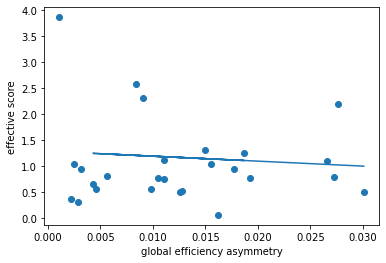

In [9]:
#Asymmetry Gama Band G_Effeiency
x = np.abs(alpha_asymmetry).reshape(-1,1)
y = Score_effective.reshape(-1,1)

x_train, x_test ,y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=42)

reg = LinearRegression()
model = reg.fit(x_train,y_train)
y_pred = reg.predict(x_test)
mse = sqrt(mean_squared_error(y_test, y_pred))
print('mse: ', mse)
print('accuracy: ',model.score(x_test, y_test))


corco = np.corrcoef(np.abs(alpha_asymmetry),Score_effective)
print('Correlation',corco)

cv = KFold(n_splits=5, random_state=1, shuffle=True)
scores = cross_val_score(model, x, y, scoring='neg_mean_absolute_error',cv=cv, n_jobs=-1)
print('K-fold_score: ',sqrt(mean(absolute(scores))))

plt.scatter(x,y)
plt.plot(x_test,y_pred)
plt.xlabel('global efficiency asymmetry')
plt.ylabel('effective score')
plt.show()